In [17]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tool

In [18]:
#read
CPBL_data = pd.read_excel("CPBL_batter.xlsx")
MLB_data = pd.read_excel("MLB_batter.xlsx")


In [19]:
#first view
CPBL_data.info()
CPBL_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   球員      163 non-null    object 
 1   隊伍      163 non-null    object 
 2   背號      163 non-null    int64  
 3   PA      163 non-null    int64  
 4   AVG     163 non-null    float64
 5   OBP     163 non-null    float64
 6   SLG     163 non-null    float64
 7   ISO     163 non-null    float64
 8   BABIP   161 non-null    float64
 9   BIP%    163 non-null    float64
 10  OPS     163 non-null    float64
 11  OPS+    163 non-null    float64
 12  tOPS+   163 non-null    float64
 13  RC      163 non-null    float64
 14  wOBA    163 non-null    float64
 15  BB%     163 non-null    float64
 16  BB/K    160 non-null    float64
 17  K%      163 non-null    float64
dtypes: float64(14), int64(2), object(2)
memory usage: 23.1+ KB


,背號,PA,AVG,OBP,SLG,ISO,BABIP,BIP%,OPS,OPS+,tOPS+,RC,wOBA,BB%,BB/K,K%
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,161.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,160.0000,163.000000
mean,40.975460,154.601227,0.214258,0.269252,0.286196,0.071920,0.266832,68.824540,0.554908,63.321472,63.311656,16.058896,0.251043,6.357055,inf,22.444172
std,29.859124,146.695601,0.109310,0.117175,0.148641,0.066956,0.129134,15.231968,0.256099,75.013732,74.831029,18.639639,0.107856,5.750287,NaN,15.289842
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,-100.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,11.500000,18.500000,0.170000,0.240000,0.210000,0.020000,0.230000,64.850000,0.460000,36.850000,34.850000,0.800000,0.210000,3.000000,0.1400,14.700000
50%,37.000000,107.000000,0.240000,0.300000,0.310000,0.060000,0.280000,71.400000,0.610000,79.800000,78.800000,7.100000,0.280000,6.200000,0.3300,19.400000
75%,65.000000,276.000000,0.276500,0.330000,0.360000,0.110000,0.320000,76.850000,0.695000,104.550000,103.450000,27.900000,0.310000,8.600000,0.5125,25.050000
max,99.000000,491.000000,1.000000,1.000000,1.000000,0.333000,1.000000,100.000000,2.000000,490.100000,481.300000,74.600000,0.810000,50.000000,inf,100.000000


In [20]:
MLB_data.info()
MLB_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    145 non-null    object 
 1   Team    145 non-null    object 
 2   G       145 non-null    int64  
 3   PA      145 non-null    int64  
 4   HR      145 non-null    int64  
 5   R       145 non-null    int64  
 6   RBI     145 non-null    int64  
 7   SB      145 non-null    int64  
 8   BB%     145 non-null    float64
 9   K%      145 non-null    float64
 10  ISO     145 non-null    float64
 11  BABIP   145 non-null    float64
 12  AVG     145 non-null    float64
 13  OBP     145 non-null    float64
 14  SLG     145 non-null    float64
 15  wOBA    145 non-null    float64
 16  xwOBA   145 non-null    float64
 17  wRC+    145 non-null    int64  
 18  BsR     145 non-null    float64
 19  Off     145 non-null    float64
 20  Def     145 non-null    float64
 21  WAR     145 non-null    float64
dtypes:

,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,145.958621,605.489655,21.855172,76.813793,74.372414,12.531034,0.088648,0.204248,0.178338,0.295793,0.258483,0.330076,0.436814,0.331400,0.342186,112.572414,0.443448,10.093103,-2.304828,2.888966
std,11.155390,64.557050,10.440293,17.756058,19.681825,10.712827,0.030633,0.056750,0.054125,0.026799,0.022535,0.029651,0.059814,0.029586,0.031667,21.039891,3.310459,16.244228,9.912067,1.922676
min,118.000000,502.000000,3.000000,45.000000,23.000000,0.000000,0.025000,0.031000,0.067000,0.243000,0.200000,0.268000,0.306000,0.263000,0.279000,65.000000,-6.100000,-24.600000,-19.500000,-0.600000
25%,138.000000,547.000000,15.000000,63.000000,61.000000,4.000000,0.064000,0.167000,0.135000,0.279000,0.241000,0.311000,0.394000,0.311000,0.321000,99.000000,-1.700000,-0.600000,-10.300000,1.400000
50%,147.000000,592.000000,20.000000,74.000000,74.000000,10.000000,0.087000,0.204000,0.173000,0.295000,0.257000,0.329000,0.433000,0.332000,0.339000,113.000000,-0.300000,8.900000,-2.700000,2.900000
75%,156.000000,655.000000,27.000000,87.000000,86.000000,20.000000,0.109000,0.252000,0.209000,0.314000,0.272000,0.350000,0.475000,0.349000,0.359000,125.000000,2.600000,19.200000,4.800000,3.800000
max,163.000000,732.000000,60.000000,146.000000,132.000000,44.000000,0.183000,0.323000,0.357000,0.376000,0.331000,0.457000,0.688000,0.463000,0.477000,204.000000,10.300000,79.400000,24.500000,10.100000


In [21]:
df = pd.concat([MLB_data, CPBL_data], axis=0, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    145 non-null    object 
 1   Team    145 non-null    object 
 2   G       145 non-null    float64
 3   PA      308 non-null    int64  
 4   HR      145 non-null    float64
 5   R       145 non-null    float64
 6   RBI     145 non-null    float64
 7   SB      145 non-null    float64
 8   BB%     308 non-null    float64
 9   K%      308 non-null    float64
 10  ISO     308 non-null    float64
 11  BABIP   306 non-null    float64
 12  AVG     308 non-null    float64
 13  OBP     308 non-null    float64
 14  SLG     308 non-null    float64
 15  wOBA    308 non-null    float64
 16  xwOBA   145 non-null    float64
 17  wRC+    145 non-null    float64
 18  BsR     145 non-null    float64
 19  Off     145 non-null    float64
 20  Def     145 non-null    float64
 21  WAR     145 non-null    float64
 22  球員

In [22]:
#check column
same_col = set(CPBL_data.columns) & set(MLB_data.columns)
diff_col = set(CPBL_data.columns) ^ set(MLB_data.columns)
print("same column: ", same_col, "\ndiff. column: ", diff_col)


same column:  {'BABIP', 'K%', 'ISO', 'PA', 'BB%', 'wOBA', 'OBP', 'AVG', 'SLG'} 
diff. column:  {'RBI', 'WAR', 'xwOBA', 'tOPS+', 'SB', '隊伍', 'Def', 'HR', 'wRC+', 'Name', 'Off', '球員', 'Team', 'BsR', 'OPS', 'BB/K', 'G', 'RC', 'R', 'OPS+', '背號', 'BIP%'}


In [23]:
#data clean
Scale = 1.232
CPBL_data.drop(columns=['BB/K','OPS','tOPS+','RC'], inplace=True)
MLB_data.drop(columns=['G','WAR','xwOBA','Def','SB'], inplace=True)
MLB_data['OPS+'] = 100 * (MLB_data['OBP']/MLB_data['OBP'].mean() + (MLB_data['SLG']/MLB_data['SLG'].mean()) - 1)
CPBL_data['Off'] = (CPBL_data['wOBA']-CPBL_data['wOBA'].mean()/Scale) - CPBL_data['PA']
CPBL_data.rename(columns={
    '球員': 'Name',
    '背號': 'Num',
    '隊伍': 'Team'
}, inplace=True)
MLB_data[['K%', 'BB%']] = MLB_data[['K%', 'BB%']] * 100

df = pd.concat([MLB_data, CPBL_data], axis=0, ignore_index=True)
df = df[df['PA'] > 20]

In [24]:
oe = OrdinalEncoder()
df['Num_Ordi'] = oe.fit_transform(df[['Num']])
df['Team_Ordi'] = oe.fit_transform(df[['Team']])

df['Num_Bi'] = df['Num_Ordi'].apply(tool.custom_binary_encode)
df['Team_Bi'] = df['Team_Ordi'].apply(tool.custom_binary_encode)
df.head()

,Name,Team,PA,HR,R,RBI,BB%,K%,ISO,BABIP,...,wRC+,BsR,Off,OPS+,Num,BIP%,Num_Ordi,Team_Ordi,Num_Bi,Team_Bi
0,Aaron Judge,NYY,679,53.0,137.0,114.0,18.3,23.6,0.357,0.376,...,204.0,-4.2,79.4,195.957204,NaN,NaN,NaN,20.0,None,10100
1,Cal Raleigh,SEA,705,60.0,110.0,125.0,13.8,26.7,0.342,0.248,...,161.0,-2.7,48.0,143.602940,NaN,NaN,NaN,24.0,None,11000
2,Bobby Witt Jr.,KCR,687,23.0,99.0,88.0,7.1,18.2,0.205,0.334,...,130.0,7.4,31.5,121.033371,NaN,NaN,NaN,13.0,None,1101
3,Shohei Ohtani,LAD,727,55.0,146.0,102.0,15.0,25.7,0.340,0.315,...,172.0,3.7,66.0,161.155348,NaN,NaN,NaN,15.0,None,1111
4,Geraldo Perdomo,ARI,720,20.0,98.0,100.0,13.1,11.5,0.173,0.303,...,138.0,3.8,36.2,123.617586,NaN,NaN,NaN,1.0,None,01


In [25]:
num_col = df.select_dtypes(include=[np.number]).columns
df_num = df[num_col]
df_num.drop(columns= ['Num','Num_Ordi','Team_Ordi'], inplace = True)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 0 to 304
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PA      265 non-null    int64  
 1   HR      145 non-null    float64
 2   R       145 non-null    float64
 3   RBI     145 non-null    float64
 4   BB%     265 non-null    float64
 5   K%      265 non-null    float64
 6   ISO     265 non-null    float64
 7   BABIP   265 non-null    float64
 8   AVG     265 non-null    float64
 9   OBP     265 non-null    float64
 10  SLG     265 non-null    float64
 11  wOBA    265 non-null    float64
 12  wRC+    145 non-null    float64
 13  BsR     145 non-null    float64
 14  Off     265 non-null    float64
 15  OPS+    265 non-null    float64
 16  BIP%    120 non-null    float64
dtypes: float64(16), int64(1)
memory usage: 37.3 KB


C:\Users\nnn60\AppData\Local\Temp\ipykernel_26736\720562906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop(columns= ['Num','Num_Ordi','Team_Ordi'], inplace = True)


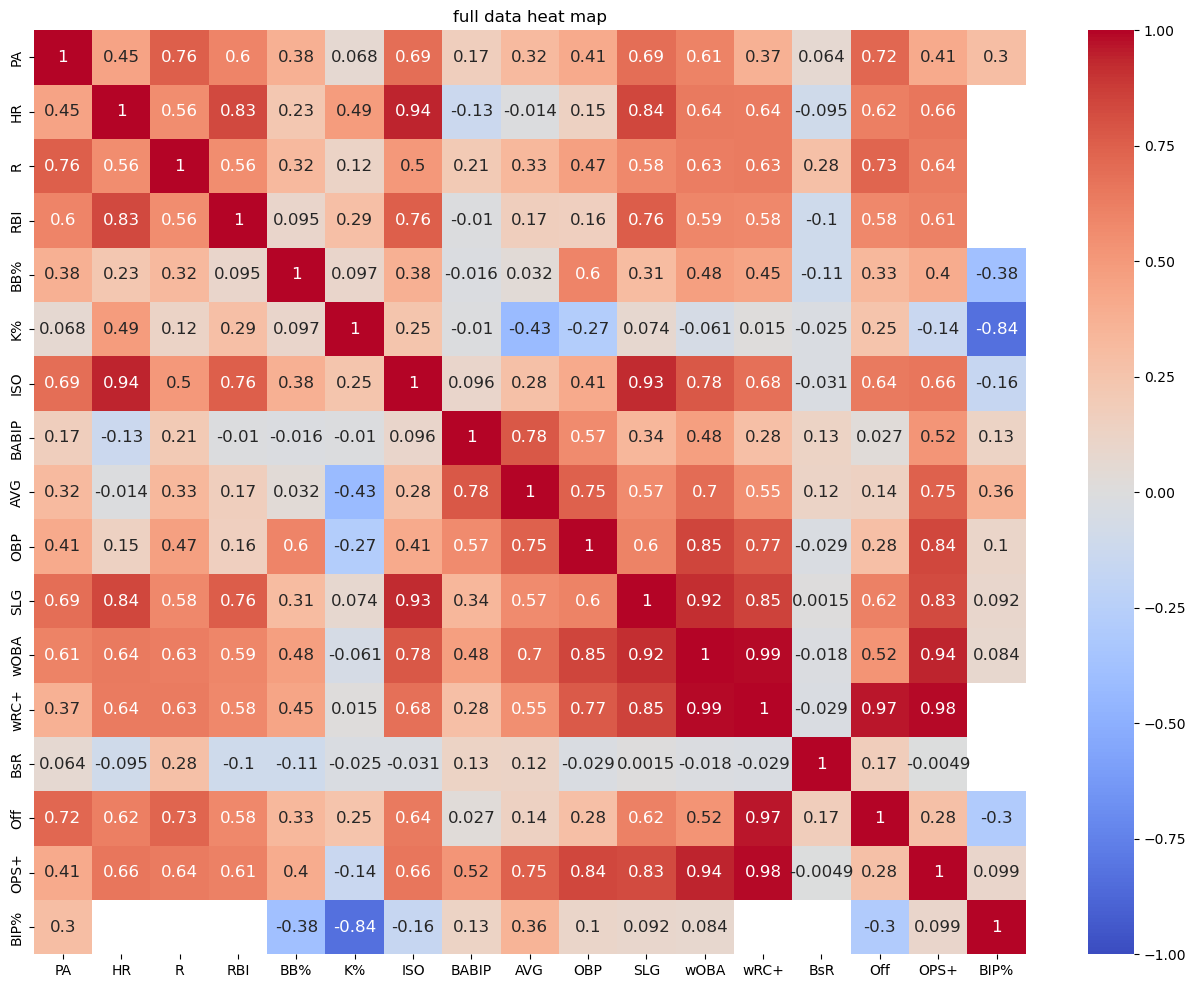

In [26]:
tool.plot_heatmap(df_num, 'full data heat map')

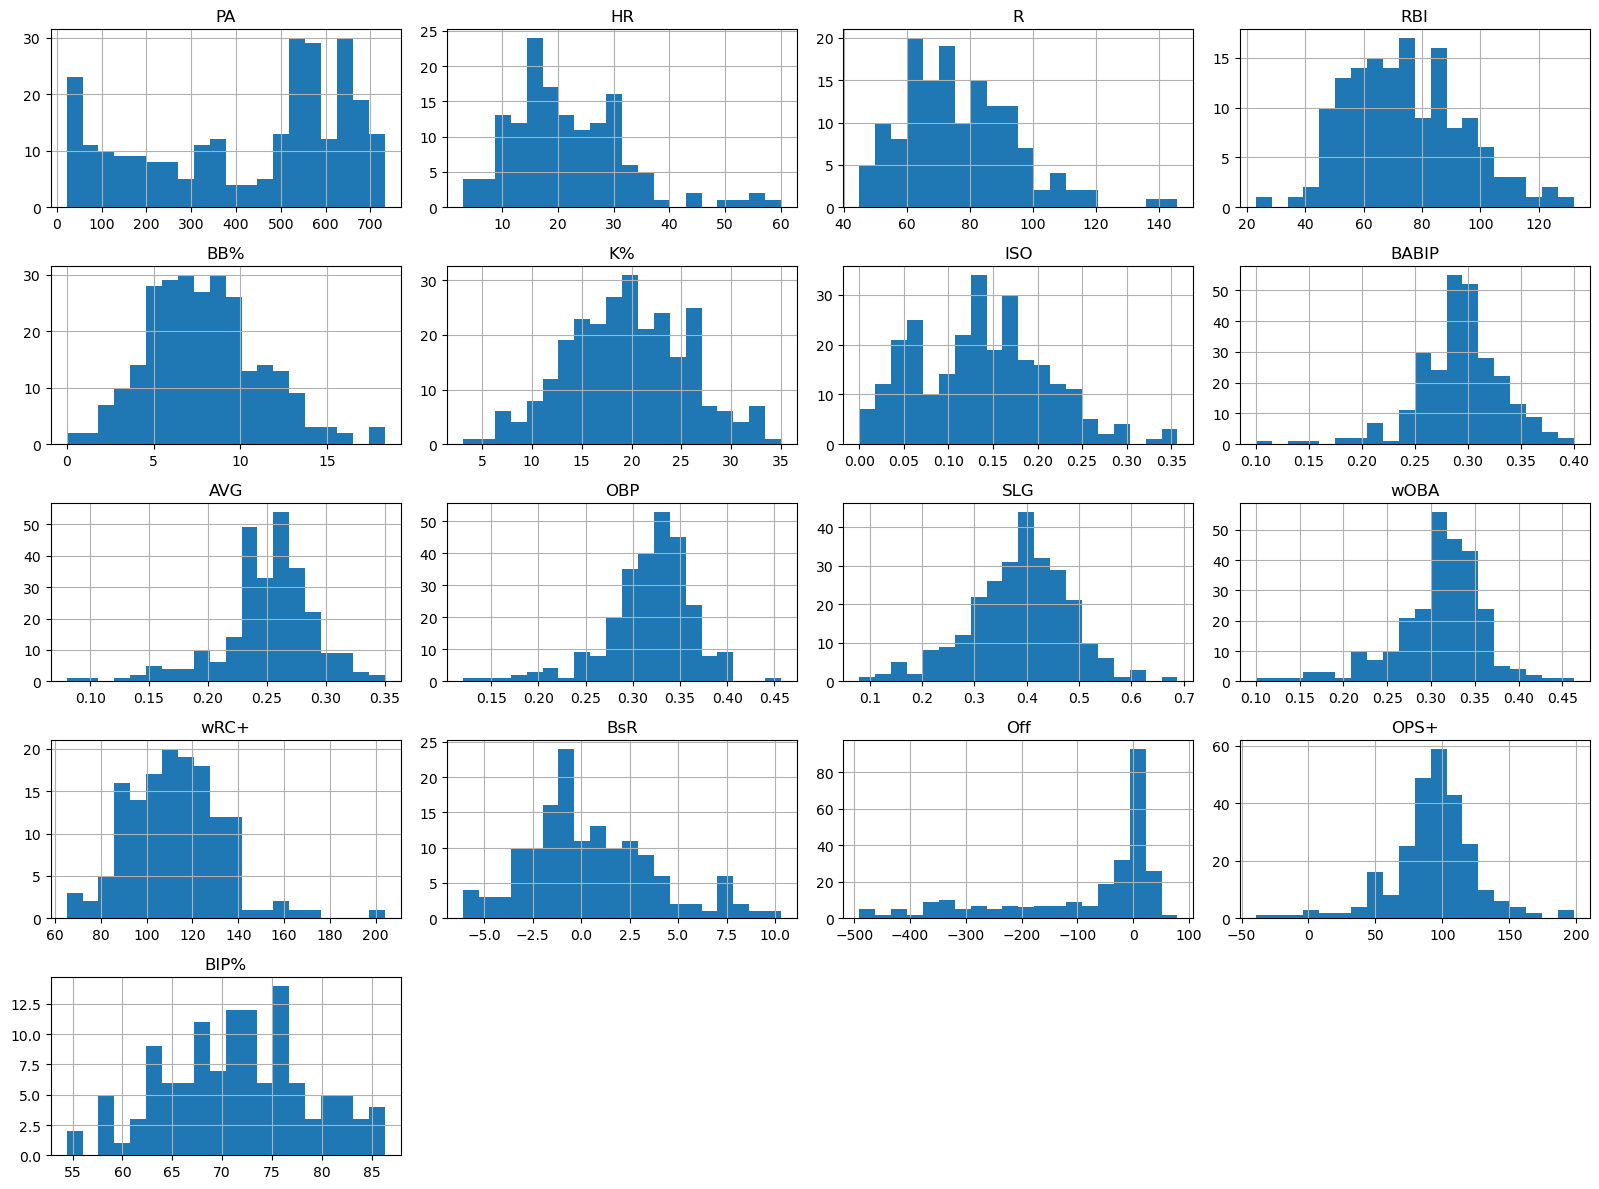

In [27]:
df_num.hist(figsize=(16, 12), bins=20, layout=(5, 4))
plt.tight_layout()
plt.show()

In [33]:
imputer = KNNImputer(n_neighbors=3)

df_imputed = pd.DataFrame(
    imputer.fit_transform(df_num),
    columns=df_num.columns,
    index=df_num.index
)

df_imputed.describe()

,PA,HR,R,RBI,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,OPS+,BIP%
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,424.996226,15.796226,67.571069,61.186164,7.949811,19.640000,0.137128,0.292943,0.250792,0.317928,0.387879,0.310275,100.226415,0.284906,-88.131254,93.488679,72.275346
std,224.222301,10.334575,16.635023,21.023789,3.208277,6.028127,0.072566,0.041286,0.039061,0.045504,0.094157,0.050427,21.481275,2.472476,142.584316,32.247807,5.350956
min,22.000000,3.000000,45.000000,23.000000,0.000000,3.100000,0.000000,0.100000,0.080000,0.120000,0.080000,0.100000,65.000000,-6.100000,-490.863769,-39.400000,54.400000
25%,214.000000,7.000000,55.000000,41.666667,5.800000,15.600000,0.080000,0.270000,0.234000,0.298000,0.330000,0.290000,85.333333,-0.700000,-164.903769,80.600000,68.866667
50%,523.000000,12.333333,59.000000,55.333333,7.800000,19.400000,0.133000,0.294000,0.256000,0.325000,0.400000,0.315000,96.000000,0.100000,-9.100000,94.559513,72.200000
75%,609.000000,21.000000,76.000000,75.000000,9.800000,23.800000,0.182000,0.318000,0.275000,0.347000,0.450000,0.340000,114.000000,0.600000,10.800000,110.700000,76.266667
max,732.000000,60.000000,146.000000,132.000000,18.300000,35.000000,0.357000,0.400000,0.350000,0.457000,0.688000,0.463000,204.000000,10.300000,79.400000,198.200000,86.300000


In [ ]:
'''df_clean = df_num.dropna(subset=['HR'])

X_train = df_clean[['ISO', 'SLG','OPS+']]
y_train = df_clean['HR']


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

missing = df.loc[df_num['HR'].isna(), ['ISO', 'SLG','OPS+']]
predicted_values = linear_model.predict(missing)

df_num.loc[df_num['HR'].isna(), 'HR'] = predicted_values
'''

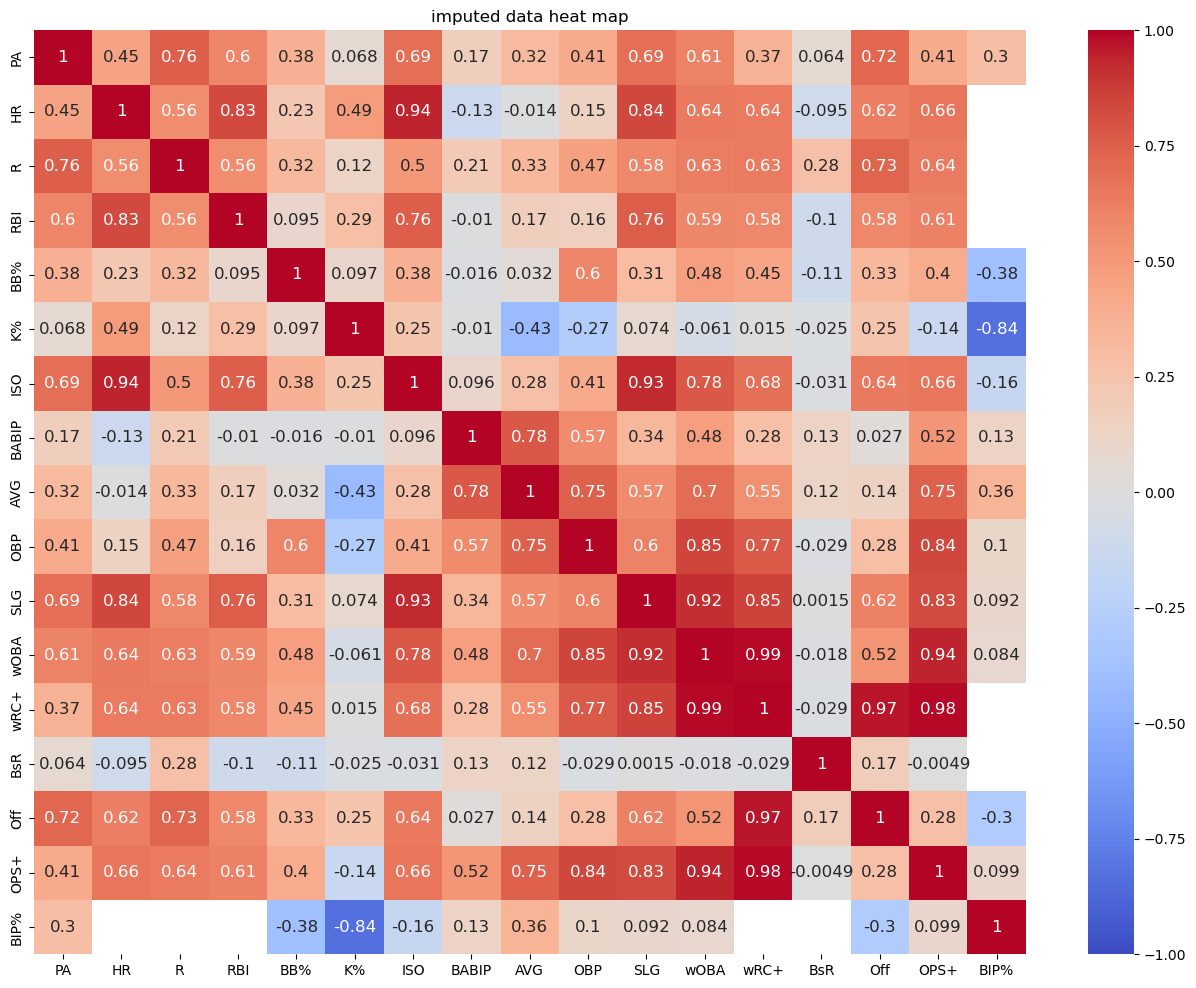

In [29]:
tool.plot_heatmap(df_num, 'imputed data heat map')

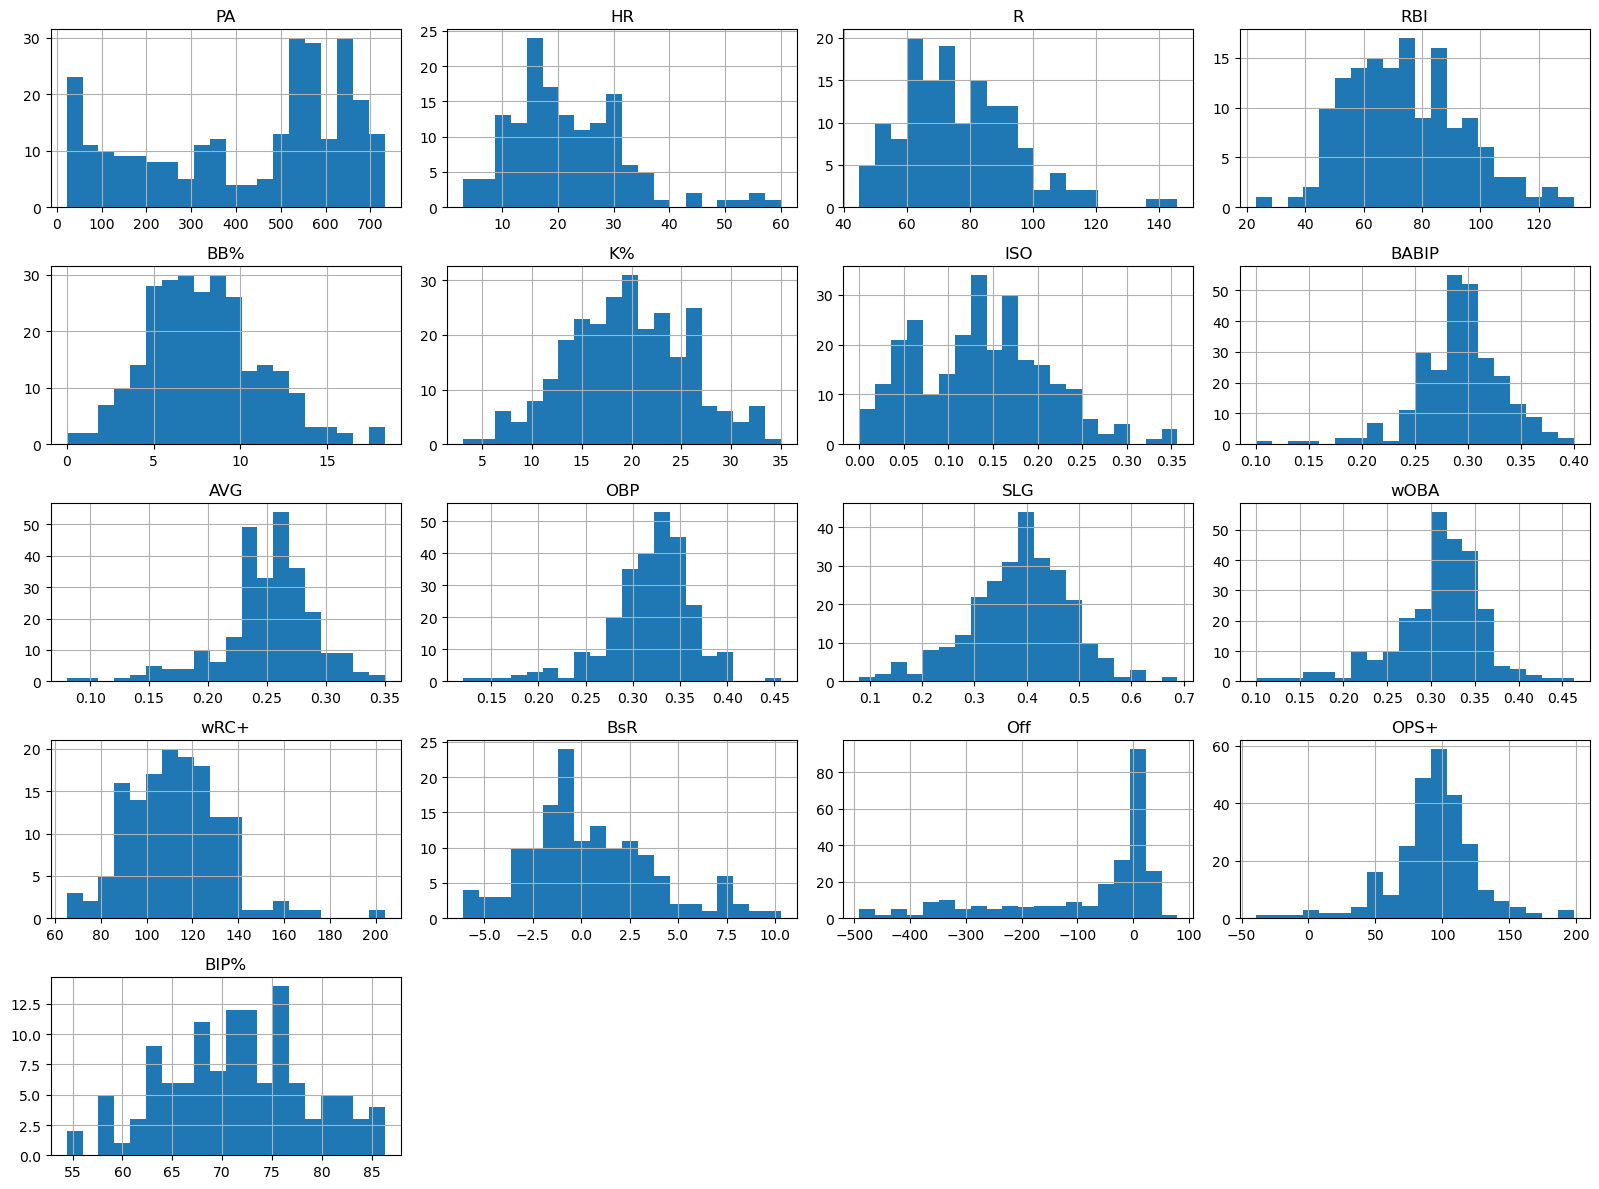

In [30]:
df_num.hist(figsize=(16, 12), bins=20, layout=(5, 4))
plt.tight_layout()
plt.show()